# CMSE 202 Final S23 (Sect. 002)


### <p style="text-align: right;"> &#9989; Trevor Bloom</p>
### <p style="text-align: right;"> &#9989; TrevorBloom</p>

The goal of this final is to give you the opportunity to test out some of the skills that you've developed this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This final is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the final.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

### INSTRUCTORS MAY WANT TO CHANGE THIS PART
While the exam will be *open* for 12 hours, **you should only take two hours on the exam.** The exam was written to take two hours. We'll be going on the honor system for this. There are times when instructors will be available to answer questions. 


### Content Knowledge Tested
- Using Github to save and track progress on your work
- Effectively visualizing data
- Using ML tools to create a classification model
- Quantitatively evaluating classification models

## Part 0: Add to your Git repository to track your progress on your exam (10 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### Part 0.1 (4 Points)

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `final`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `final` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

## Part 1 (5 Points)

For this exam, you’ll be working with a data set that contains measurements of the physical characteristics of dry seeds (e.g., shape, size, etc.). This is a subset of the larger dataset that can be [found here](http://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset). We’ll ask you a set of questions that center the classification of these seeds using techniques you’ve worked with in class and on the homework. 

To get started, let’s grab the dataset we’ll be working with.

**Use the following URL to download the dataset. Import the dataset in the cell below.**

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv`

In [3]:
#Write your code for downloading the data here

#curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/Final/Seed_data.csv

#done in terminal

In [2]:
#Write your code for importing the data here
import pandas as pd

seeds = pd.read_csv('Seed_data.csv')

seeds

,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,SEKER
1,0.887034,0.003564,0.953861,SEKER
2,0.947849,0.003048,0.908774,SEKER
3,0.903936,0.003215,0.928329,SEKER
4,0.984877,0.003665,0.970516,SEKER
...,...,...,...,...
9090,0.916603,0.001749,0.801865,DERMASON
9091,0.922015,0.001886,0.822252,DERMASON
9092,0.918424,0.001888,0.822730,DERMASON
9093,0.907906,0.001852,0.817457,DERMASON


## Part 2 (15 Points)

Use Seaborn to make a visualization showing the distributions (I.e., histograms and/or scatterplots) of each of the different seed characteristics. Your visualization should represent each of the different seed type/classes as a different color. This should all be a single figure. Use the [**examples in the seaborn gallery**](https://seaborn.pydata.org/examples/index.html) to help you find the right type of figure. (Note: There are several types of figures that will work for this.)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seed Characteristics')

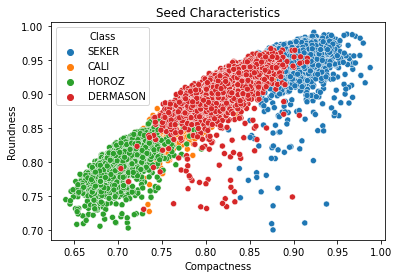

In [21]:
#Write your plotting code here
import seaborn as sb
import matplotlib.pyplot as plt

sb.scatterplot(seeds['Compactness'], seeds['roundness'], hue=seeds['Class'])

plt.ylabel('Roundness')
plt.title('Seed Characteristics')

## Part 3 (15 Points)

Look at the distributions of the data. Without doing any model fitting (I.e., just by eye), which pair of seeds do you think would be **easiest** for an ML technique to differentiate between? Which pair of seeds do you believe would be **hardest** to separate? **Why?** Justify your answers using your visualization.

I believe Horoz and Seker would be the easiest to differentiate. As the Horoz seeds are concentrated in the lower left quadrant while Seker has a comparably high compactness, even for outliers with similar roundness. I believe Cali will be very difficult to differentiaite from Dermason as there is significant overlap in their characteristics.

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4 (15 Points)

Create a new dataframe that only contains data for the seeds that you believe will be easiest to separate. (You may need to use Google to figure out how to do this.)

In [18]:
#Write your code for selecting your data here
seeds_filter = seeds.drop(seeds[(seeds['Class'] == 'CALI')].index)

seeds_final = seeds.drop(seeds[(seeds['Class'] == 'DERMASON')].index)

seeds_final

,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,SEKER
1,0.887034,0.003564,0.953861,SEKER
2,0.947849,0.003048,0.908774,SEKER
3,0.903936,0.003215,0.928329,SEKER
4,0.984877,0.003665,0.970516,SEKER
...,...,...,...,...
5554,0.794104,0.000830,0.687782,HOROZ
5555,0.785117,0.000782,0.674331,HOROZ
5556,0.802588,0.000837,0.691181,HOROZ
5557,0.777191,0.000816,0.685733,HOROZ


## Part 5 (5 Points)

Split the data into a training and testing set. (Make sure to change the class values so that they're 0 and 1, instead of the actual seed names.) Also, for stupid reasons, set the `random_state` to be 35.

In [28]:
for i in range(len(seeds_final)):
    if seeds_final['Class'][i] == 'SEKER':
        seeds_final['Class'][i] = 0
    else:
        seeds_final['Class'][i] = 1
        
seeds_final

<ipython-input-28-5684e06252ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds_final['Class'][i] = 0
<ipython-input-28-5684e06252ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seeds_final['Class'][i] = 1


,roundness,ShapeFactor2,Compactness,Class
0,0.958027,0.003147,0.913358,0
1,0.887034,0.003564,0.953861,0
2,0.947849,0.003048,0.908774,0
3,0.903936,0.003215,0.928329,0
4,0.984877,0.003665,0.970516,0
...,...,...,...,...
5554,0.794104,0.000830,0.687782,1
5555,0.785117,0.000782,0.674331,1
5556,0.802588,0.000837,0.691181,1
5557,0.777191,0.000816,0.685733,1


In [30]:
#Write your code for splitting your data here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import time
import statsmodels.api as sm
import numpy as np

xtrain, xtest, ytrain, ytest = \
train_test_split(seeds_final[['Compactness']], seeds_final[['roundness']], test_size=0.33, random_state=35)

## Part 6 (20 Points)

Create and train a model (either regression or SVM) for classifying the data. You can choose which type of model you want to use. **Note:** You may get multiple warnings when creating your model (warnings are *pink*). You may also get a warning about a failure to converge. It is fine to ignore these warnings. 

In [36]:
#Write your code for training your model here

lin_reg = sm.OLS(ytrain, xtrain).fit()

print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:              roundness   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.753e+06
Date:                Wed, 03 May 2023   Prob (F-statistic):                        0.00
Time:                        17:17:44   Log-Likelihood:                          6707.8
No. Observations:                3724   AIC:                                 -1.341e+04
Df Residuals:                    3723   BIC:                                 -1.341e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

---
### &#128721; STOP (2 points)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 7 (5 Points)

Evaluate your model by finding the accuracy, recall, and precision using the training data.

In [ ]:
#Write your code for determining the accuracy, recall, and precision of your model

## Part 8 (10 Points)

Do you think that this model does a good job of classifying the data? How does it compare to previous classification models you’ve created, both in class and on the homework?

*Write your answer here*

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository.

---

## You're done! Congrats on finishing CMSE 202!

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University